# Project 3 - Interpolation and interpolating polynomials
## Part 1 - Newton Interpolation

Laurence M. Brown
HSCI - 3316

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# %load Makefile
# %load Makefile
#############################################################
######
# Makefile for project 3
# Laurence Brown
# SMU Mathematics
# Math 3316
# 11/2/2016
#############################################################
######
# compiler & flags
CXX = g++
CXXFLAGS = -O -std=c++0x
# makefile targets
#newton_test.exe	:	newton.cpp	test_newton.cpp


all:
	$(CXX) $(CXXFLAGS) test_newton.cpp -o test_newton.exe
	
	chmod 755 *.exe
	chmod 755 *.txt

clean :
	rm -f *.exe *.txt
####### End of Makefile #######


SyntaxError: invalid syntax (<ipython-input-2-d9a8fcede47a>, line 13)

## Newton Polynomials

<br>
Given n distinct data points, $(x_0,y_0),(x_1,y_1), ... , (x_n,y_n)$, the following is a form and method for obtaining and representing an interpolating polynomial.
<br>
<br>
Polynomial in Newton form : 
<br>
<br>
$$p_n(x)= a_0 + a_1(x-x_0)+ a_2(x-x_0)(x-x_1) + ... + a_n(x-x_0)(x-x_1)...(x-x_{n-1})$$
<br>
Where $p_n(x_i) = y_i$.
<br>
Constructing an interpolating polynomial in Newton form has the advantage of easily adding extra data points to your model.
<br>
<br>
$$p_{k+1}(x) = p_k(x) + a_{k+1}(x − x_0)(x − x_1)· · ·(x − x_k)$$
<br>
Because $p_0(x)$ is known ($p_0(x) = y_0 = a_0$), and the condition $p_n(x_n) = y_n$ must always be met, it possible to devise a recursive method for solving the coeffiencts $a_0, a_1, ... a_{n+1}$, the process of constructing the n+1 coeffiencts is the process of constructing the newton polynomial.
<br>
<br>
The general construction of a newton polynomial follows the following steps:
<br>
<br>
$$a_0 = y_0,$$
$$p_0(x) = y_0$$
<br>
$$a_1 = \frac {y_1 − p_0(x1)} {(x1 − x0)},$$
$$p_1(x) = a_0 + a_1(x − x_0)$$
<br>
$$...$$
<br>
$$a_{n+1} = \frac {y_{n+1} − p_n(x_{n+1})} {(x_{n+1} − x_0)(x_{n+1} − x_1)· · ·(x_{n+1} − x_n)},$$
<br>
$$p_{n+1}(x) = pn(x) + a_{n+1}(x − x_0)(x − x_1)· · ·(x − x_n)$$
<br>
<br>
The goal of the code bellow is to construct the newton polynomial given a data set, and to compare the values produced by the newton polynomial, $p_4(x)$ with the actual function value, $f(x)$. The code will capture these values in addition to the error, $error = \{ \; |f(x_0) - p_4(x_0)|,\; |f(x_1) - p_4(x_1)|, \; ... , \; |f(x_n) - p_4(x_n)| \; \} $. My expectation is that the error will be oscillatory, and increase the farther the input is from the set of xnodes from the data set.

### Implimentation

The data sets y nodes are produced by the function
$f(x) = 3.1x^4 + 2.3x^3 − 6.6x^2 + 8.7x + 7.9$
and a set of x values $\{−2, −1, 0, 1, 2\}$. 
<br>
$$y_i = f(x_i)$$
<br>
Where the function $f(x)$ and $p_4(x)$ are both evaulated 201 times  on the equally spaced x-values on the interval [−3, 3].
<br>

In [3]:
# %load test_newton.cpp
/*

	test_newton.cpp
	Laruence M. Brown
  	Math 3316
   	3 November 2016

									polynomial interpolation
										  newton form

*/

#include <iostream>
#include <vector>
#include <math.h>

using namespace std;

/*
	function prototypes
*/
double 			f(double x);
double 			Newton_nestedform(vector<double> a, vector<double> xnodes, double x);
double 			Newton_basis(vector<double> xnodes, int n, double x);
vector<double> 	Newton_coefficients(vector<double> xnodes, vector<double> ynodes);
vector<double> 	gen_ynodes(vector<double> xnodes);

vector<double> 	Linspace(double a, double b, int n);
double 			sum_vector(vector<double> v);
int 			write(std::vector<double> v, const char *outfile);
void 			print_vector(vector<double> v);


int main(){

	//data set
	vector<double> xnodes = {-2, -1, 0, 1 ,2};					//given xs
	vector<double> ynodes = gen_ynodes(xnodes);					//given ys
	vector<double> as = Newton_coefficients(xnodes, ynodes);	//get coeffients
	vector<double> xs = Linspace(-3,3,201); 					//inputs to function
	vector<double> ps;											//interpolated
	vector<double> fxs;											//actual
	vector<double> err;											//error

	for (int i=0; i<xs.size(); i++){

		//compute f(xi) values
		fxs.push_back(f(xs[i]));

		//compute pn(xi) values
		ps.push_back(Newton_nestedform(as,xnodes,xs[i]));

		//compute error values, |f(xi) - pn(xi)|
		err.push_back(fxs[i]-ps[i]);
	}

	//write to files
	write(xs, "xs.txt");	//inputs
	write(fxs, "fxs.txt");	//f(xi)
	write(ps, "ps.txt");	//pn(xi)
	write(err, "err.txt");	//|f(xi) - pn(xi)|

	return 0;
}

//f(xi) = yi
double f(double x){ 
	//f(x) = 3.1x^4 + 2.3x^3 − 6.6x^2 + 8.7x + 7.9
	return ((3.1) * pow(x,4)) + ((2.3) * pow(x,3)) - ((6.6) * pow(x,2)) + (8.7 *x) + 7.9;
}

//applies function to each element in vector, returns new vector
vector<double> gen_ynodes(vector<double> xnodes){
	//gernerate y nodes: f(x) = 3.1x^4 + 2.3x^3 − 6.6x^2 + 8.7x + 7.9
	vector<double> ynodes;
	for (int i=0; i<xnodes.size(); i++)
		ynodes.push_back(f(xnodes[i]));
	return ynodes;
}

double Newton_basis(vector<double> xnodes, int n, double x){
	//phi_n+1(x) = (xn - x0)(xn - x1) ... (xn - xn-1)
    double phi= 1.0;
    for(int i=0 ; i < n; i++)
        phi*= (x-xnodes[i]);
    return phi;
}

//calulates pn(x) given coefficient matrix and xnodes
double Newton_nestedform(vector<double> a, vector<double> xnodes, double x){
	//p_n(x)= a_0 + a_1(x-x_0)+ a_2(x-x_0)(x-x_1) + ... + a_n(x-x_0)(x-x_1)...(x-x_{n-1})
    double pn=0.0;
    for(int i=0 ; i< a.size(); i++)
        pn+=Newton_basis(xnodes,i, x)*a[i];
    return pn;
}

//calculates a0, a1, ... , an+1 coefficents for newton polynomial given data set
vector<double> Newton_coefficients(vector<double> xnodes, vector<double> ynodes){
	//a_{n+1} = \frac {y_{n+1} − p_n(x_{n+1})} {(x_{n+1} − x_0)(x_{n+1} − x_1)· · ·(x_{n+1} − x_n)}
    vector<double> as;
    for(int i = 0; i< xnodes.size(); i++){
        double numerator = ynodes[i] - Newton_nestedform(as,xnodes, xnodes[i]);
        double denomiator = (Newton_basis(xnodes,i,xnodes[i]));
        as.push_back((numerator)/denomiator);
    }
    return as;
}

/*
	additional functions
*/

//create a new vector of linearly space data
vector<double> Linspace(double a, double b, int n){
	if (n<2) cerr << "Linspace::length must be > 1\n";
	vector<double> v(n);
	
	double h = (b-a)/(n-1);
	for (int i=0; i<n; i++)
	 	v[i] = a + i*h;

	return v;
}

//colapse vector to double, (sum entries)
double sum_vector(vector<double> v){
	double  sum = 0;
	for (int i=0; i<v.size(); i++)
		sum += v[i];
	return sum;
}

//write a vector to a file
int write(std::vector<double> v, const char *outfile) { 

  // open output file
  FILE *fptr = NULL;
  fptr = fopen(outfile, "w");
  if (fptr == NULL) {
    cerr << "Write:: error, unable to open " << outfile << " for writing\n";
    return 1;
  }

  // print data to file
  for (size_t i=0; i<v.size(); i++) {
      fprintf(fptr, "  %.16g", v[i]);
  }

  // close output file and return
  fclose(fptr);
  return 0;
}

//log vector
void print_vector(vector<double> v){
	for (int i=0; i<v.size(); i++)
		cout << v[i] << " ";
	cout << endl;
}


IndentationError: unexpected indent (<ipython-input-3-b438c9817f1b>, line 4)

In [4]:
#import collected data
fx = loadtxt('fxs.txt') #f(x) values
px = loadtxt('ps.txt')  #p_n(x) values
xs = loadtxt('xs.txt')  #inputs
err = loadtxt('err.txt')#|f(x) - p_n(x)|

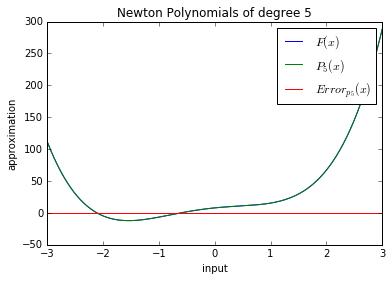

In [5]:
plot(xs,fx,xs,px,xs,err)
xlabel('input')
ylabel('approximation')
title('Newton Polynomials of degree 5')
legend(('$F(x)$', '$P_4(x)$', '$Error_{p_4}(x)$'))

The approximation of $f(x)$ with $p_4(x)$ turned out to be extreemly accurate over the interval $[-3,3]$. As can be seen above the curves produced by $f(x)$ and $p_4(x)$ are nearly identicle, and this accuracy has been achieved with a data set of only five points.

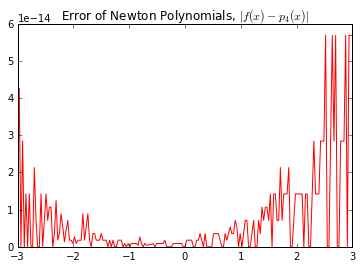

In [7]:
plot(xs,err, '-r')
title('Error of Newton Polynomials, $|f(x) - p_4(x)|$')

As can be seen above the error, $|f(x_i) - p_4(x_i)|$ is highly oscillatory and it's value increases as it approaches the tails of the data set, $y_0$ and $y_n$. The error becomes zero every time an xnode is used as an input.